In [35]:
import os
import pydotplus 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interp
from itertools import cycle

import sklearn
from sklearn import preprocessing,tree,svm,datasets,metrics
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor

# data preprocessing

  ## read data from csv file

In [36]:
dtype={'age':np.int64,
        'job' : np.str_,
        'marital' : np.str_,
        'education' : np.str_,
        'default' : np.str_,
        'housing' : np.str_,
        'loan':np.str_,
        'contact' : np.str_,
        'month' : np.str_,
        'day_of_week' : np.str_,
        'duration' : np.int64,
        'campaign':np.int64,
        'pdays':np.int64,
        'previous':np.int64,
        'poutcome':np.str_,
        'emp.var.rate':np.float64,
        'cons.price.idx':np.float64,
        'cons.conf.idx':np.float64,
        'euribor3m':np.float64,
        'nr.employed':np.float64,
        'y':np.str_}
data = pd.read_csv("bank_clean.csv",dtype=dtype, usecols=dtype)
print data

       age            job   marital            education  default  housing  \
0       56      housemaid   married             basic.4y       no       no   
1       57       services   married          high.school  unknown       no   
2       37       services   married          high.school       no      yes   
3       40         admin.   married             basic.6y       no       no   
4       56       services   married          high.school       no       no   
5       45       services   married             basic.9y  unknown       no   
6       59         admin.   married  professional.course       no       no   
7       41    blue-collar   married              unknown  unknown       no   
8       24     technician    single  professional.course       no      yes   
9       25       services    single          high.school       no      yes   
10      41    blue-collar   married              unknown  unknown       no   
11      25       services    single          high.school       n

  ## data encoding

In [37]:
con_col = [i for i in data.columns if (data.dtypes[i] == 'int64') | (data.dtypes[i] == 'float64')]
cat_col = [i for i in data.columns if (i not in con_col)]
for col in cat_col:
    LBL_Model = preprocessing.LabelEncoder()
    LBL_Model.fit(data[col])
    data[col] = LBL_Model.transform(data[col])
print data

       age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        1        0     0        1      6   
2       37    7        1          3        0        2     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     2        1      6   
5       45    7        1          2        1        0     0        1      6   
6       59    0        1          5        0        0     0        1      6   
7       41    1        1          7        1        0     0        1      6   
8       24    9        2          5        0        2     0        1      6   
9       25    7        2          3        0        2     0        1      6   
10      41    1        1          7        1        0     0        1      6   
11      25    7        2          3        0        

  ## split training data and testing data

In [38]:
Train_X = data.drop('y',axis = 1)
Y = data['y']
X_train,X_test,Y_train,Y_test = train_test_split(Train_X,Y,test_size = 0.2)
print X_train

       age  job  marital  education  default  housing  loan  contact  month  \
17666   48    5        1          0        1        0     0        0      3   
20182   30    4        1          3        0        0     0        0      1   
21042   31    9        1          5        1        1     1        1      1   
37149   46   11        1          7        0        0     2        0      1   
27701   28    9        2          6        0        0     0        0      5   
10764   40    7        2          3        0        0     0        1      4   
21187   32    0        2          6        0        0     0        0      1   
8428    54    7        1          3        0        2     0        1      4   
11246   39    1        1          1        1        2     0        1      4   
9627    40    9        1          5        0        0     0        1      4   
19050   34    0        1          6        1        2     0        0      1   
6188    55    0        1          3        0        

  ## data standard scaling

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print X_train

[[ 0.47628267 -1.03627969  1.36304866 ..., -1.43012921 -1.27908164
  -0.9524497 ]
 [-1.53804283 -1.03627969  1.36304866 ..., -1.23524736 -1.37102598
  -0.9524497 ]
 [ 0.47628267 -1.03627969 -0.28113253 ...,  0.95176014  0.76798093
   0.8405459 ]
 ..., 
 [-0.67476047  1.46874359 -0.28113253 ...,  0.95176014  0.76855919
   0.8405459 ]
 [ 0.28444215  1.46874359 -0.28113253 ..., -1.23524736 -1.35541279
  -0.9524497 ]
 [-0.77068073  1.46874359  1.36304866 ..., -1.23524736 -1.35078666
  -0.9524497 ]]


# machine learning models

  ## use decision tree model

In [39]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, Y_train)
dt_params = dt.get_params()
dt_prediction = dt.predict(X_test)

  ## use svm model

In [24]:
svm_model = svm.SVC()
svm_model.fit(X_train,Y_train)
svm_params = svm_model.get_params()
svm_prediction = svm_model.predict(X_test)

# data visualization

  ## plotting decision tree model

   ### export dot file for plotting

In [40]:
with open("banking.dot", 'w') as f:
    f = tree.export_graphviz(dt, out_file=f)
os.unlink('banking.dot')

   ### plotting decision tree model and export to PDF file

In [41]:
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("banking.pdf")

True

  ## plotting ROC curves of above models

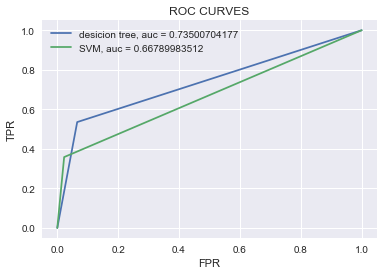

In [25]:
%matplotlib inline
plt.figure(0).clf()

def data_visualize(prediction,name):
    fpr, tpr, thresh = metrics.roc_curve(Y_test, prediction)
    auc = metrics.roc_auc_score(Y_test, prediction)
    plt.plot(fpr,tpr,label = name + str(auc))
    
data_visualize(dt_prediction, "desicion tree, auc = ")
data_visualize(svm_prediction, "SVM, auc = ")

plt.legend(loc=0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVES')
plt.grid(True)